#**SPAM EMAIL DETECTION**

#***1. Data Checks to Perform***

***1.1 Import Necessary Libaries***

In [ ]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

***1.2 Load the Data***

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')

In [ ]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#eeeee4")]}
])
styled_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


#***2. Data Cleaning***

***2.1 Data Information***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
styled_df = df.head(5).style
# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#eeeee4"), ('font-weight', 'bold')]}
])

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


***2.2 Rename the Column***

In [ ]:
# Rename the columns name
df.rename(columns = {'Category': 'target', 'Message': 'text'}, inplace = True)

***2.3 Convert the Target Variable***

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
styled_df = df.head().style
# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#eeeee4"), ('font-weight', 'bold')]}
])

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


***2.4 Check Missing Values***

In [ ]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

***2.5 Check Duplicate Values***

In [ ]:
#check duplicate values
df.duplicated().sum()

415

***2.6 Remove Duplicate Values***

In [ ]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

***2.7 Shape of the Dataset***

In [ ]:
df.shape

(5157, 2)

#***3. EDA (Exploratory Data Analysis)***

***3.1 Percentage of Ham and Spam***

In [ ]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.5702928058949
percentage of 1 : 12.429707194105099


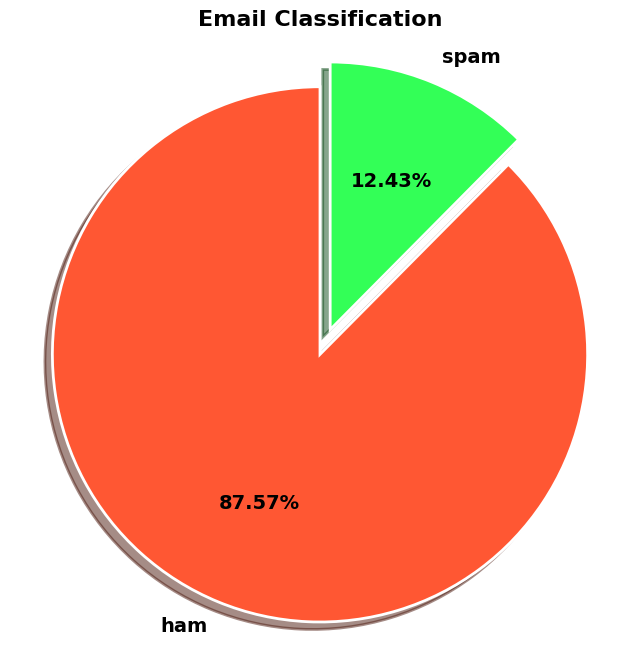

In [ ]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

***3.2 Text Length and Structure Analysis***

In [ ]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.228040,18.544890,1.969750
std,58.451149,13.401415,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


***3.3 Summary Statistics for Legitimate Emails***

In [ ]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.250664,1.827724
std,56.730031,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


***3.4 Summary Statistics for Spam Emails***

In [ ]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,641.000000,641.000000,641.000000
mean,137.541342,27.663027,2.970359
std,30.516111,7.104050,1.485575
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


***3.5 Character Length Distribution for Legitimate and Spam Emails***

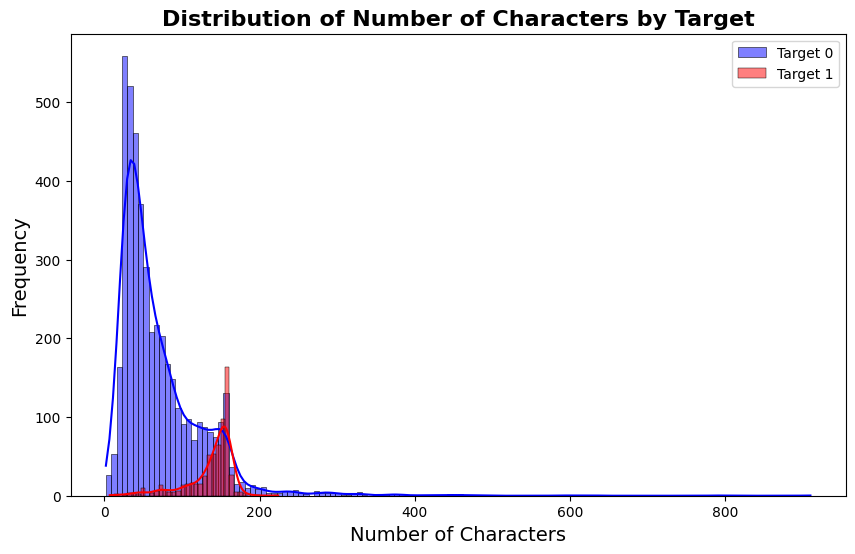

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

***3.6 Word Count Distribution for Legitimate and Spam***

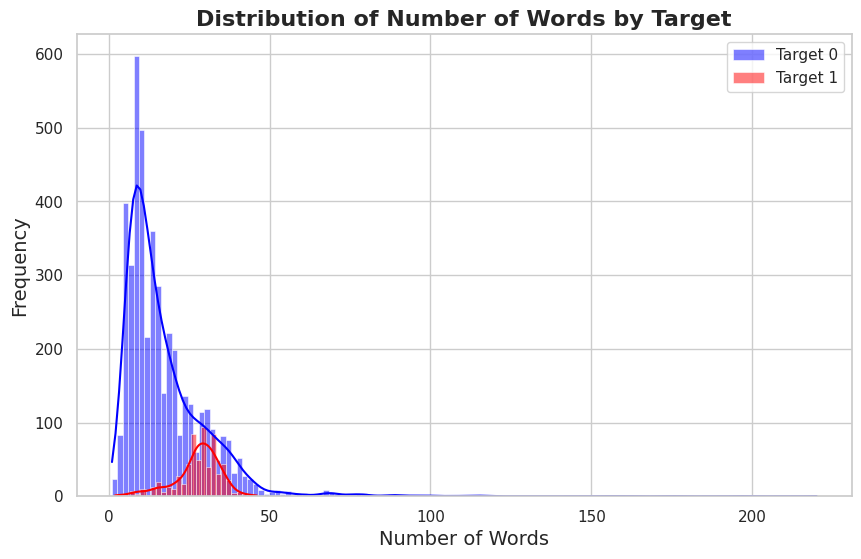

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

***3.7 Pairplot for Data Visualization***

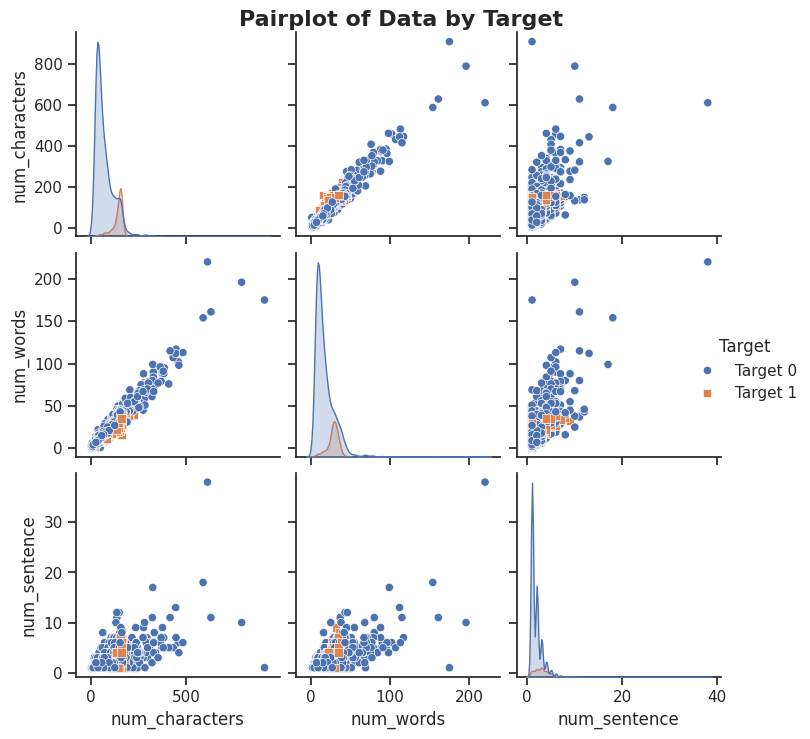

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

***3.8 Coorelation***

In [ ]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.375897,0.256360,0.259023
num_characters,0.375897,1.000000,0.966006,0.622302
num_words,0.256360,0.966006,1.000000,0.679503
num_sentence,0.259023,0.622302,0.679503,1.000000


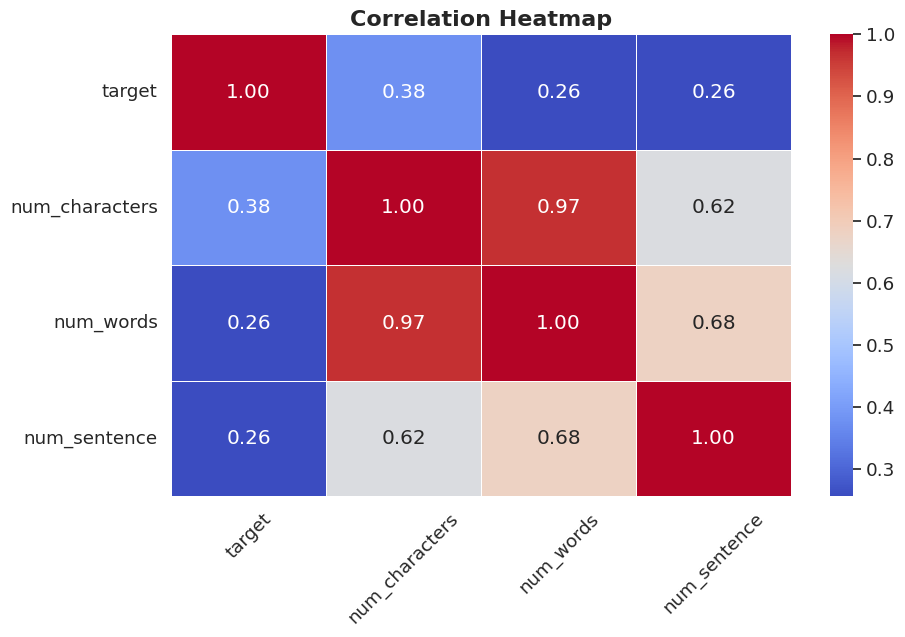

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

# ***4. Data Preprocessing***

In [ ]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

***4.1 Creating a New Column: 'transformed_text'***

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
styled_df = df.head(5).style
# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#eeeee4"), ('font-weight', 'bold')]}
])

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though


***4.2 Word Cloud for Spam Emails***

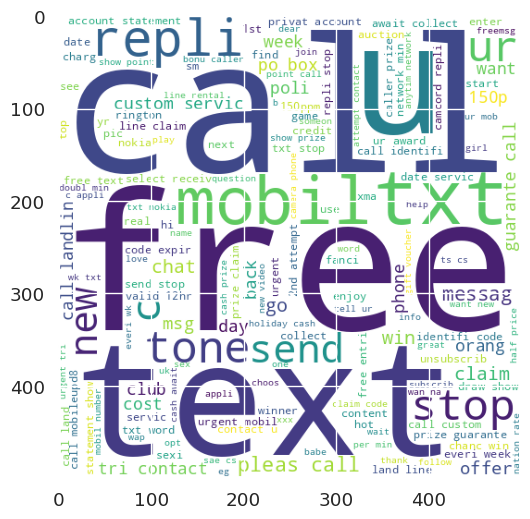

In [ ]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

***4.3 Word Cloud for Not Spam Emails***

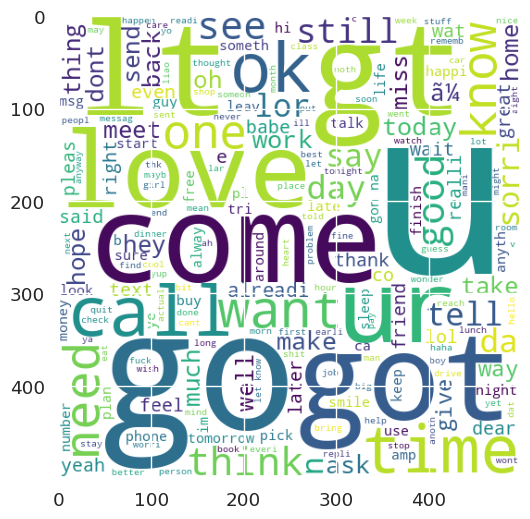

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

***4.4 Find top 30 Words of Spam Emails***

In [ ]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [ ]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

<ipython-input-32-b4964bcadea0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


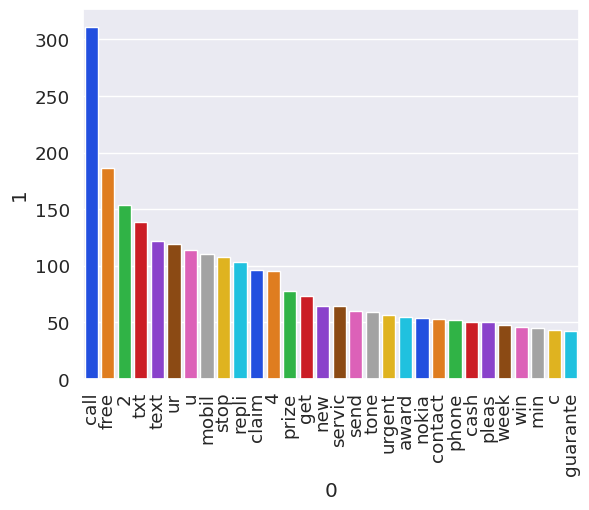

In [ ]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

***4.5 Find top 30 words of Not Spam Emails***

In [ ]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [ ]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

<ipython-input-35-8d8ff60dadd0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


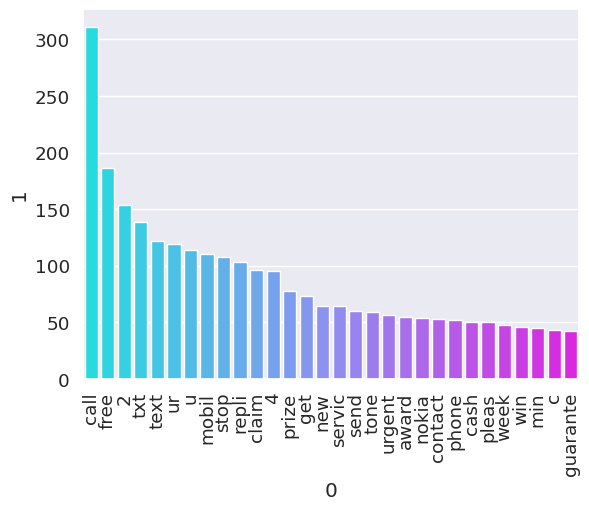

In [ ]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

# ***5. Model Building***

***5.1 Initializing CountVectorizer and TfidfVectorizer***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

***5.2 Dependent and Independent Variable***

In [ ]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

***5.3 Split into Train and Test Data***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

***5.4 Import the Models***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

***5.5 Initialize the Models***

In [ ]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

***5.6 Dictionary of the Models***

In [ ]:
clfs = {
    'Support Vector Classifier (SVC)': svc,
    'K-Nearest Neighbour Classifier (KNN)': knc,
    'Naïve Bayes Classifier (NB)': mnb,
    'Decision Tree Classifier (DT)': dtc,
    'Logistic Regression (LR)': lrc,
    'Random Forest Classifier (RF)': rfc,
    'Adaptive Boosting Classifier (Adaboost)': abc,
    'Bagging Classifier (BGC)': bc,
    'Extra Trees Classifier (ETC)': etc,
    'Gradient-Boosted Decision Trees Classifier (GBDT)': gbdt,
    'Extreme Gradient Boosting Classifier (XGB)': xgb
}

***5.7 Train the Models***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy , precision , recall , f1 , cm

# ***6. Evaluate the Models***


For:  Support Vector Classifier (SVC)

Accuracy:  0.9777131782945736

Precision:  0.9905660377358491

Recall:  0.8267716535433071

F-1 Measure:  0.9012875536480687

Confusion Matrix: 
 [[904   1]
 [ 22 105]]



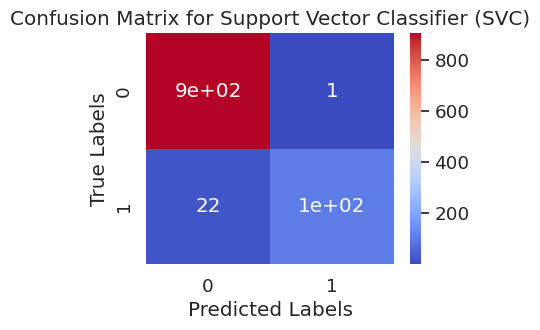


For:  K-Nearest Neighbour Classifier (KNN)

Accuracy:  0.9127906976744186

Precision:  1.0

Recall:  0.29133858267716534

F-1 Measure:  0.45121951219512196

Confusion Matrix: 
 [[905   0]
 [ 90  37]]



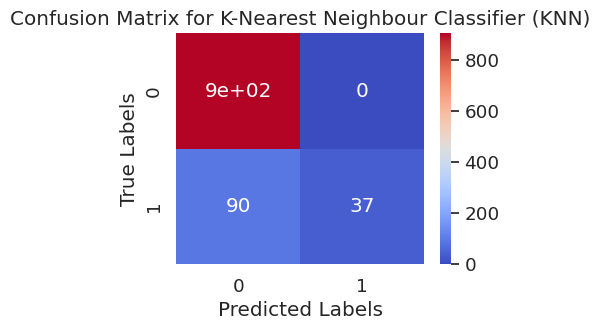


For:  Naïve Bayes Classifier (NB)

Accuracy:  0.9728682170542635

Precision:  1.0

Recall:  0.7795275590551181

F-1 Measure:  0.8761061946902654

Confusion Matrix: 
 [[905   0]
 [ 28  99]]



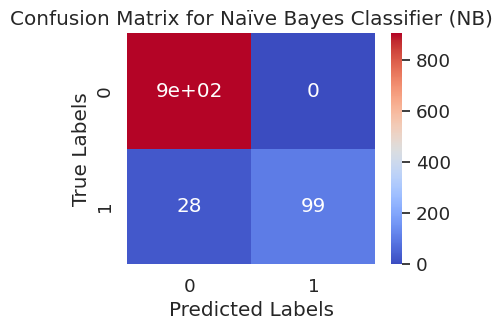


For:  Decision Tree Classifier (DT)

Accuracy:  0.936046511627907

Precision:  0.8210526315789474

Recall:  0.6141732283464567

F-1 Measure:  0.7027027027027027

Confusion Matrix: 
 [[888  17]
 [ 49  78]]



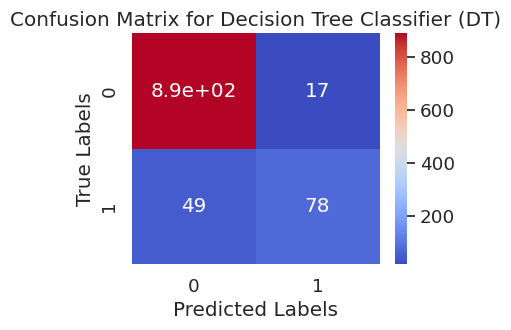


For:  Logistic Regression (LR)

Accuracy:  0.9583333333333334

Precision:  0.9375

Recall:  0.7086614173228346

F-1 Measure:  0.8071748878923766

Confusion Matrix: 
 [[899   6]
 [ 37  90]]



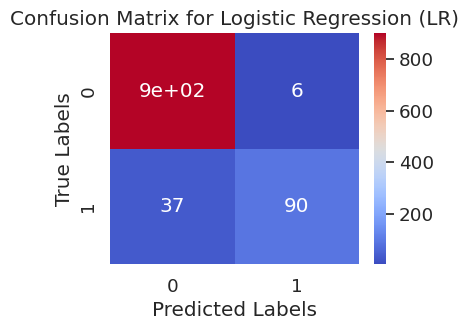


For:  Random Forest Classifier (RF)

Accuracy:  0.9709302325581395

Precision:  1.0

Recall:  0.7637795275590551

F-1 Measure:  0.8660714285714286

Confusion Matrix: 
 [[905   0]
 [ 30  97]]



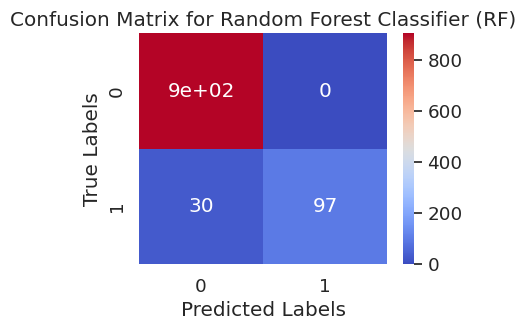


For:  Adaptive Boosting Classifier (Adaboost)

Accuracy:  0.9670542635658915

Precision:  0.9514563106796117

Recall:  0.7716535433070866

F-1 Measure:  0.8521739130434782

Confusion Matrix: 
 [[900   5]
 [ 29  98]]



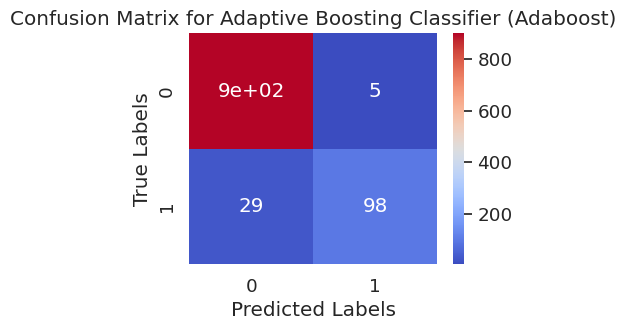


For:  Bagging Classifier (BGC)

Accuracy:  0.9612403100775194

Precision:  0.8918918918918919

Recall:  0.7795275590551181

F-1 Measure:  0.8319327731092437

Confusion Matrix: 
 [[893  12]
 [ 28  99]]



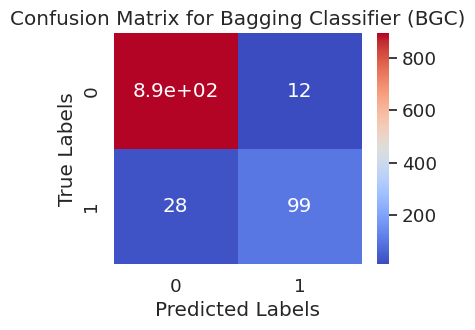


For:  Extra Trees Classifier (ETC)

Accuracy:  0.9777131782945736

Precision:  0.9905660377358491

Recall:  0.8267716535433071

F-1 Measure:  0.9012875536480687

Confusion Matrix: 
 [[904   1]
 [ 22 105]]



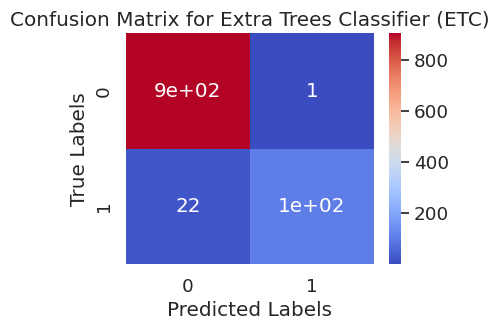


For:  Gradient-Boosted Decision Trees Classifier (GBDT)

Accuracy:  0.9496124031007752

Precision:  0.9746835443037974

Recall:  0.6062992125984252

F-1 Measure:  0.7475728155339806

Confusion Matrix: 
 [[903   2]
 [ 50  77]]



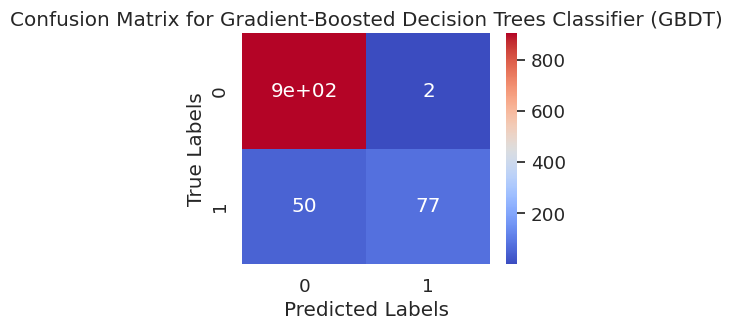


For:  Extreme Gradient Boosting Classifier (XGB)

Accuracy:  0.9748062015503876

Precision:  0.9719626168224299

Recall:  0.8188976377952756

F-1 Measure:  0.8888888888888888

Confusion Matrix: 
 [[902   3]
 [ 23 104]]



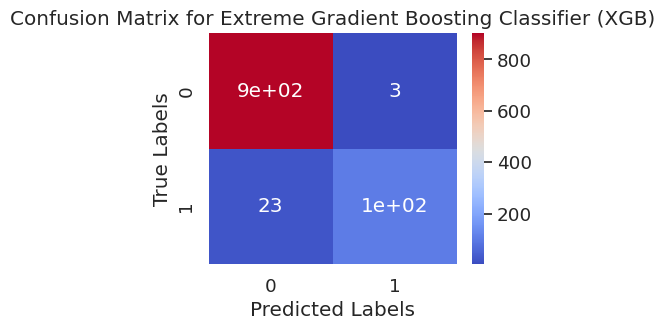

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision, current_recall, current_f1 , cm = train_classifier(clfs, X_train, y_train, X_test, y_test)

    print()
    print("For: ", name)
    print()
    print("Accuracy: ", current_accuracy)
    print()
    print("Precision: ", current_precision)
    print()
    print("Recall: ", current_recall)
    print()
    print("F-1 Measure: ", current_f1)
    print()
    print("Confusion Matrix: \n", cm)
    print()
   # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(4, 3))  # Adjust the size as needed
    sn.heatmap(pd.DataFrame(cm, index=[i for i in range(cm.shape[0])], columns=[i for i in range(cm.shape[1])]),
               annot=True, cmap='coolwarm')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

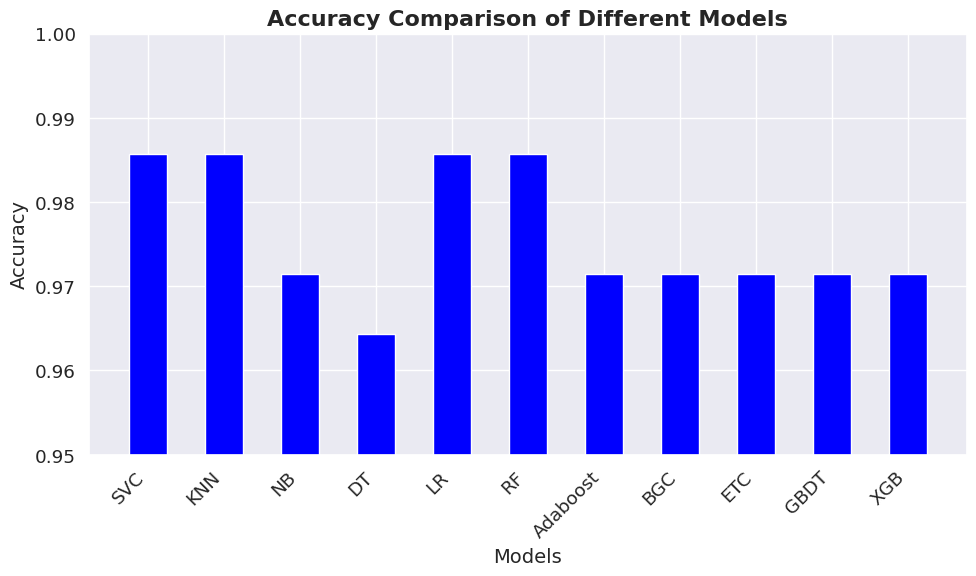

In [ ]:
import matplotlib.pyplot as plt
models = ['SVC', 'KNN', 'NB', 'DT', 'LR', 'RF', 'Adaboost', 'BGC', 'ETC', 'GBDT', 'XGB']
accuracy_scores = [0.98571429, 0.98571429, 0.97142857, 0.96428571, 0.98571429, 0.98571429, 0.97142857, 0.97142857, 0.97142857, 0.97142857, 0.97142857]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='blue', width=0.5)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison of Different Models', fontsize=16, fontweight='bold')
plt.ylim(0.95, 1.0)  # Set the y-axis limits
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Improve spacing between elements
plt.show()


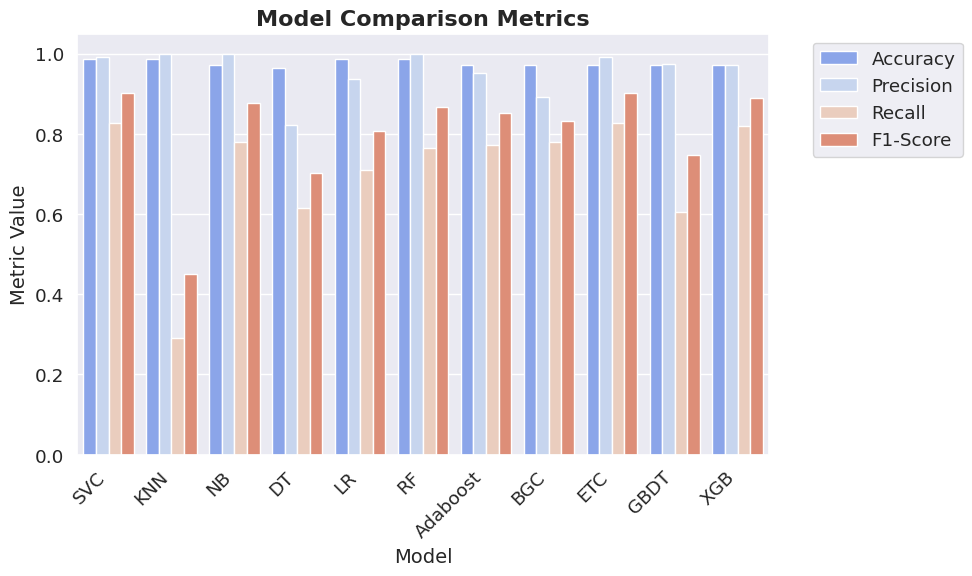

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of model names and their corresponding short names
model_names = ['Support Vector Classifier (SVC)',
                'K-Nearest Neighbour Classifier (KNN)',
                'Naïve Bayes Classifier (NB)',
                'Decision Tree Classifier (DT)',
                'Logistic Regression (LR)',
                'Random Forest Classifier (RF)',
                'Adaptive Boosting Classifier (Adaboost)',
                'Bagging Classifier (BGC)',
                'Extra Trees Classifier (ETC)',
                'Gradient-Boosted Decision Trees Classifier (GBDT)',
                'Extreme Gradient Boosting Classifier (XGB)']
model_short_names = ['SVC', 'KNN', 'NB', 'DT', 'LR', 'RF', 'Adaboost', 'BGC', 'ETC', 'GBDT', 'XGB']

# Create a dictionary to store the metrics for each model
metrics = {
    'Model': range(len(model_short_names)),  # Use indices instead of model names
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}
# Create a DataFrame to store the metrics
df_metrics = pd.DataFrame(metrics)
# Reshape the DataFrame to have metrics as columns
df_metrics_melted = df_metrics.melt(id_vars=['Model'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='value', hue='variable', data=df_metrics_melted, palette='coolwarm')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.title('Model Comparison Metrics', fontsize=16, fontweight='bold')

# Set x-axis labels to model short names
plt.xticks(range(len(model_short_names)), model_short_names, rotation=45, ha='right')

# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Improve spacing between elements
plt.show()

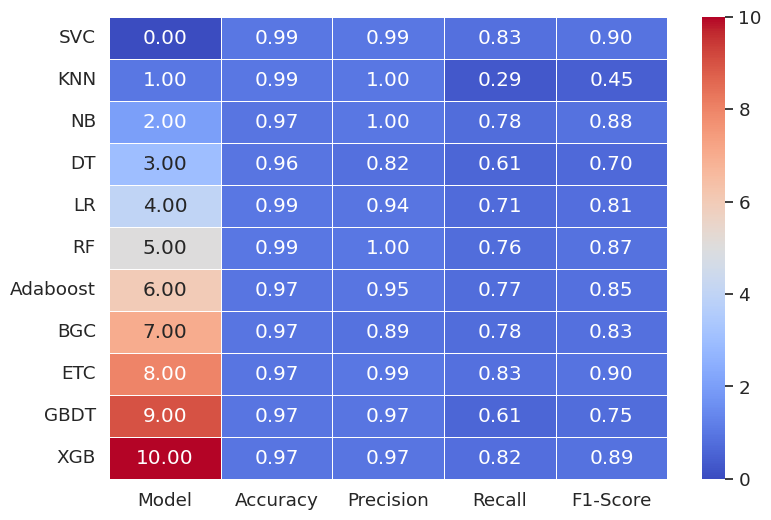

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_metrics is your DataFrame with model performance metrics

# Set the index to be the model short names
df_metrics.index = model_short_names

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_metrics, annot=True, fmt=".2f", linewidths=.5, ax=ax, cmap='coolwarm')

# Show the plot
plt.show()